# Daily Sunspot Record

Emma Skelton

Data accessed 3 June 2025 from: https://www.sidc.be/SILSO/datafiles#total

*  Total Sunspot Number > Daily Total Sunspot Number > csv
*  info: https://www.sidc.be/SILSO/infosndtot

In [125]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. load data

In [126]:
# 1. Load data
df = pd.read_csv('SN_d_tot_V2.0.csv', sep = ';', header = None)
# visualize
print(df)

          0  1   2         3    4     5   6  7
0      1818  1   1  1818.001   -1  -1.0   0  1
1      1818  1   2  1818.004   -1  -1.0   0  1
2      1818  1   3  1818.007   -1  -1.0   0  1
3      1818  1   4  1818.010   -1  -1.0   0  1
4      1818  1   5  1818.012   -1  -1.0   0  1
...     ... ..  ..       ...  ...   ...  .. ..
75752  2025  5  27  2025.401  104   9.7  25  0
75753  2025  5  28  2025.404  108  12.1  31  0
75754  2025  5  29  2025.407  100  13.2  25  0
75755  2025  5  30  2025.410  117  13.7  34  0
75756  2025  5  31  2025.412  115  12.8  30  0

[75757 rows x 8 columns]


# 2. clean the data

first, label columns according to info:
Filename: SN_d_tot_V2.0.csv
Format: Comma Separated values (adapted for import in spreadsheets)
The separator is the semicolon ';'.

Contents:
Column 1-3: Gregorian calendar date
* Year
* Month
* Day
* Column 4: Date in fraction of year.
* Column 5: Daily total sunspot number. A value of -1 indicates that no number is available for that day (missing value).
* Column 6: Daily standard deviation of the input sunspot numbers from individual stations.
* Column 7: Number of observations used to compute the daily value.
* Column 8: Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

In [127]:
# add list of column names
cols = ['Year', 'Month', 'Day', 'YrFrac', 'Sn', 'Standard_dev', 'number_obs', 'indicator']
#assign column names to the dataframe
df.columns = cols
#print to see
print(df)

       Year  Month  Day    YrFrac   Sn  Standard_dev  number_obs  indicator
0      1818      1    1  1818.001   -1          -1.0           0          1
1      1818      1    2  1818.004   -1          -1.0           0          1
2      1818      1    3  1818.007   -1          -1.0           0          1
3      1818      1    4  1818.010   -1          -1.0           0          1
4      1818      1    5  1818.012   -1          -1.0           0          1
...     ...    ...  ...       ...  ...           ...         ...        ...
75752  2025      5   27  2025.401  104           9.7          25          0
75753  2025      5   28  2025.404  108          12.1          31          0
75754  2025      5   29  2025.407  100          13.2          25          0
75755  2025      5   30  2025.410  117          13.7          34          0
75756  2025      5   31  2025.412  115          12.8          30          0

[75757 rows x 8 columns]


In [128]:
#convert to a datetime object to plot timeseries more easily
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
print(df)

       Year  Month  Day    YrFrac   Sn  Standard_dev  number_obs  indicator  \
0      1818      1    1  1818.001   -1          -1.0           0          1   
1      1818      1    2  1818.004   -1          -1.0           0          1   
2      1818      1    3  1818.007   -1          -1.0           0          1   
3      1818      1    4  1818.010   -1          -1.0           0          1   
4      1818      1    5  1818.012   -1          -1.0           0          1   
...     ...    ...  ...       ...  ...           ...         ...        ...   
75752  2025      5   27  2025.401  104           9.7          25          0   
75753  2025      5   28  2025.404  108          12.1          31          0   
75754  2025      5   29  2025.407  100          13.2          25          0   
75755  2025      5   30  2025.410  117          13.7          34          0   
75756  2025      5   31  2025.412  115          12.8          30          0   

        datetime  
0     1818-01-01  
1     1818-01

In [129]:
# clean data by removing missing values, 0 observations, and provisional data
cleaned_df = df[(df['Sn'] >= 0) & (df['number_obs'] > 0) & (df['indicator'] > 0)]
print(cleaned_df)

       Year  Month  Day    YrFrac   Sn  Standard_dev  number_obs  indicator  \
7      1818      1    8  1818.021   65          10.2           1          1   
12     1818      1   13  1818.034   37           7.7           1          1   
16     1818      1   17  1818.045   77          11.1           1          1   
17     1818      1   18  1818.048   98          12.6           1          1   
18     1818      1   19  1818.051  105          13.0           1          1   
...     ...    ...  ...       ...  ...           ...         ...        ...   
75601  2024     12   27  2024.988  257          31.7          27          1   
75602  2024     12   28  2024.990  254          34.6          29          1   
75603  2024     12   29  2024.993  233          33.1          18          1   
75604  2024     12   30  2024.996  218          22.8          20          1   
75605  2024     12   31  2024.999  183          24.5          17          1   

        datetime  
7     1818-01-08  
12    1818-01

# 3. plot

Text(0, 0.5, 'Sunspot Number ($S_n$)')

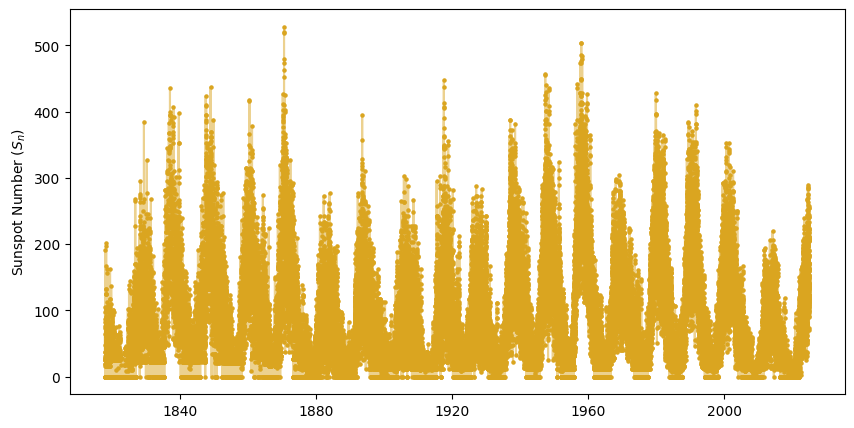

In [137]:
# plot time series of sunspot data
plt.figure(figsize=(10, 5))  # width=10 inches, height=5 inches
plt.plot(cleaned_df.datetime, cleaned_df.Sn, c= 'goldenrod', alpha= 0.5)
plt.scatter(cleaned_df.datetime, cleaned_df.Sn, c= 'goldenrod', s = 5)
#add labels
plt.ylabel('Sunspot Number ($S_n$)')

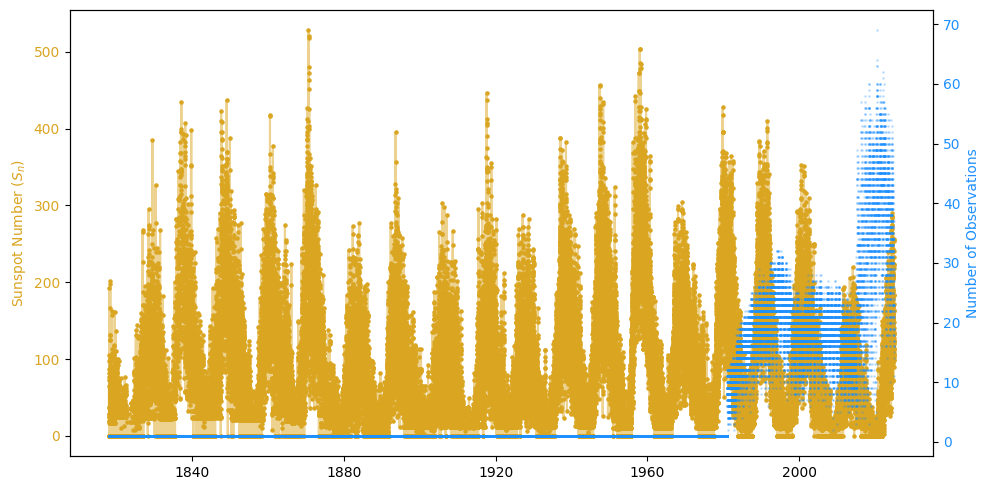

In [138]:
# dual y-axes to also show increasing number of observaitons over time
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot on primary y-axis (left)
ax1.plot(cleaned_df.datetime, cleaned_df.Sn, c='goldenrod', alpha=0.5, zorder =5)
ax1.scatter(cleaned_df.datetime, cleaned_df.Sn, c='goldenrod', s=5, zorder =5)
ax1.set_ylabel('Sunspot Number ($S_n$)', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

# Create secondary y-axis (right)
ax2 = ax1.twinx()
ax2.scatter(cleaned_df.datetime, cleaned_df.number_obs, c='dodgerblue', s=1, alpha =0.2, zorder = 1)
ax2.set_ylabel('Number of Observations', color='dodgerblue')
ax2.tick_params(axis='y', labelcolor='dodgerblue')


plt.xlabel('Date')
plt.tight_layout()


# 4. Show periodicity

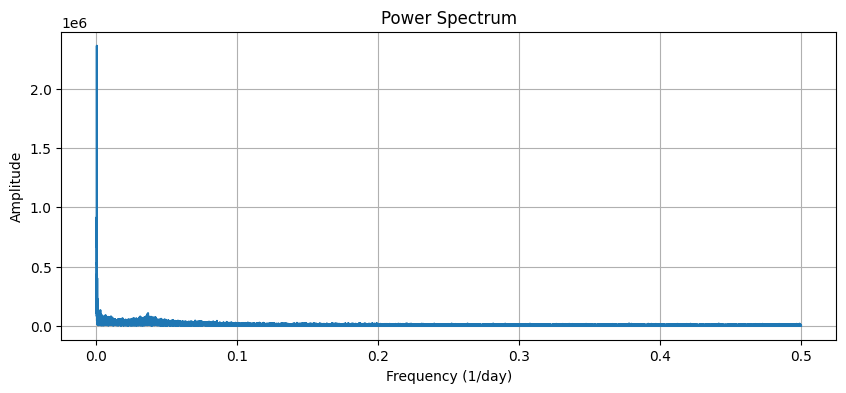

Estimated periodicity: 3987.21 days


In [139]:
import numpy as np
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt

# Use the daily time series column
y = df['Sn'].values
N = len(y)
dt = 1  # one sample per day

# Remove mean to focus on periodic components
y_detrended = y - np.mean(y)

# FFT
yf = rfft(y_detrended)
xf = rfftfreq(N, dt)  # frequencies in 1/day

# Power spectrum plot
plt.figure(figsize=(10, 4))
plt.plot(xf[1:], np.abs(yf[1:]))  # skip the zero frequency (mean)
plt.xlabel('Frequency (1/day)')
plt.ylabel('Amplitude')
plt.title('Power Spectrum')
plt.grid(True)
plt.show()

# Find dominant frequency (excluding zero)
dominant_freq = xf[np.argmax(np.abs(yf[1:])) + 1]
period_days = 1 / dominant_freq
print(f"Estimated periodicity: {period_days:.2f} days")

In [140]:
period_years = period_days / 365.25  # using average year length including leap years
print(f"Estimated periodicity: {period_years:.2f} years")

Estimated periodicity: 10.92 years


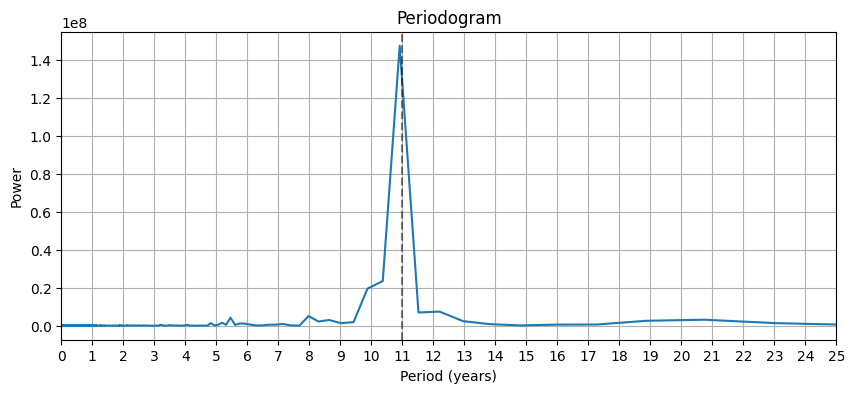

In [141]:
from scipy.signal import periodogram
import matplotlib.pyplot as plt

# If y is your daily time series:
fs = 1  # 1 sample per day
y = df.Sn.dropna()  # make sure to drop NaNs

freqs, power = periodogram(y, fs=fs)

# Convert frequency to period in years (skip zero frequency)
period_years = (1 / freqs[1:]) / 365.25

plt.figure(figsize=(10, 4))
plt.plot(period_years, power[1:])
plt.xlabel('Period (years)')
plt.ylabel('Power')
plt.title('Periodogram')
# Set x ticks every 1 year from 0 to 25
ticks = np.arange(0, 26, 1)
plt.xticks(ticks)

plt.axvline(11, color = 'k', ls = '--', alpha = 0.5)
plt.grid(True)
plt.xlim(0, 25)  # adjusted to zoom in on the peak
plt.show()

In [142]:
# check to make sure data is sampled regularly
time_diffs = df.datetime.diff()

print(time_diffs.describe())

count              75756
mean     1 days 00:00:00
std      0 days 00:00:00
min      1 days 00:00:00
25%      1 days 00:00:00
50%      1 days 00:00:00
75%      1 days 00:00:00
max      1 days 00:00:00
Name: datetime, dtype: object


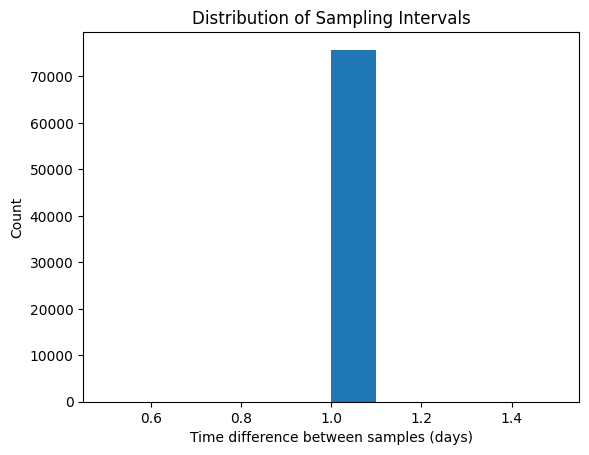

In [143]:
# Convert timedeltas to number of days (float)
time_diffs_in_days = time_diffs.dt.total_seconds() / (3600 * 24)

# Now you can plot it
import matplotlib.pyplot as plt

plt.hist(time_diffs_in_days, bins=10)
plt.xlabel('Time difference between samples (days)')
plt.ylabel('Count')
plt.title('Distribution of Sampling Intervals')
plt.show()